# Рынок заведений общественного питания Москвы

## 1. Загрузка данных и подготовка их к анализу


Изучим исходный датафрейм. Посмотрим информацию и выведем на экран.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
try:
    data = pd.read_csv('/datasets/rest_data.csv')
except:
    data = pd.read_csv('Downloads/rest_data.csv')

In [3]:
from io import BytesIO
import requests
spreadsheet_id = '1rHr7fBmRON4FtU-XxaE6fSXA1zfWI_CdC3lPy5tTtng'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz_streets = pd.read_csv(BytesIO(r.content))
mosgaz_streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [4]:
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Проверим уникальные значения в столбце 'object_type'

In [6]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Приведем к нижнему регистру значния из столбца 'object_name'

In [7]:
data['object_name'] = data['object_name'].str.lower()

Посмотрим количество дубликатов

In [8]:
data.duplicated().sum()

0

Дубликатов нет, переходим к следующему этапу

## 2. Анализ данных

Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [9]:
data_pivot_sort = data.pivot_table(index = 'object_type', values = 'id', aggfunc = 'count').sort_values('id', ascending=False).reset_index()
data_pivot_sort

,object_type,id
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


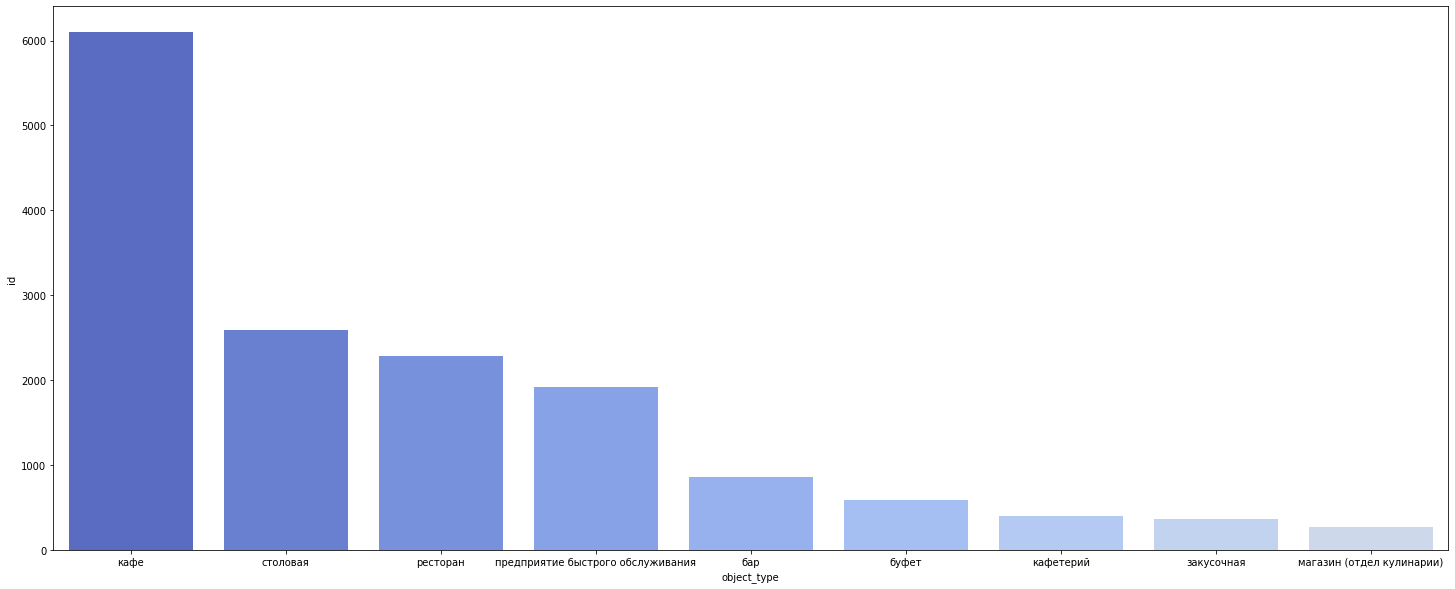

In [10]:
plt.rcParams['figure.figsize']=(25,10)
current_palette = sns.color_palette('coolwarm', 20)
sns.barplot(x='object_type', y='id', data=data_pivot_sort, palette = current_palette)
plt.show()

Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.


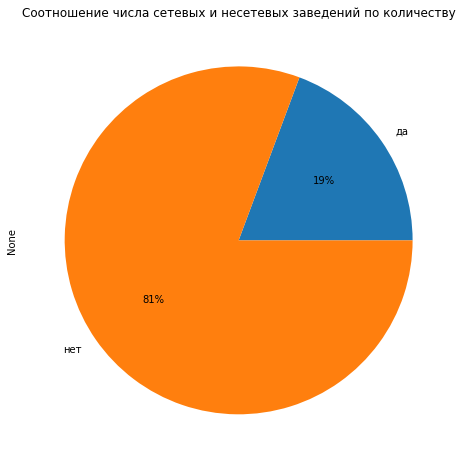

In [11]:
data_chain = data.groupby('chain').size()
data_chain.plot(kind='pie', figsize=(8, 8), autopct='%.0f%%')
plt.title("Соотношение числа сетевых и несетевых заведений по количеству")
plt.show()

Для какого вида объекта общественного питания характерно сетевое распространение?


In [12]:
data

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [13]:
data_pivot_chain = data.pivot_table(index = 'object_type', values = 'id', columns = 'chain', aggfunc = 'count').reset_index()
data_pivot_chain['chain_ratio_percent'] = data_pivot_chain['да'] / (data_pivot_chain['да'] + data_pivot_chain['нет']) * 100
data_pivot_chain = data_pivot_chain.sort_values('chain_ratio_percent', ascending = False)

In [14]:
data_pivot_chain

chain,object_type,да,нет,chain_ratio_percent
6,предприятие быстрого обслуживания,791,1132,41.133645
5,магазин (отдел кулинарии),78,195,28.571429
7,ресторан,544,1741,23.807440
3,кафе,1396,4703,22.888998
2,закусочная,56,304,15.555556
4,кафетерий,52,346,13.065327
0,бар,37,819,4.322430
1,буфет,11,574,1.880342
8,столовая,3,2584,0.115964


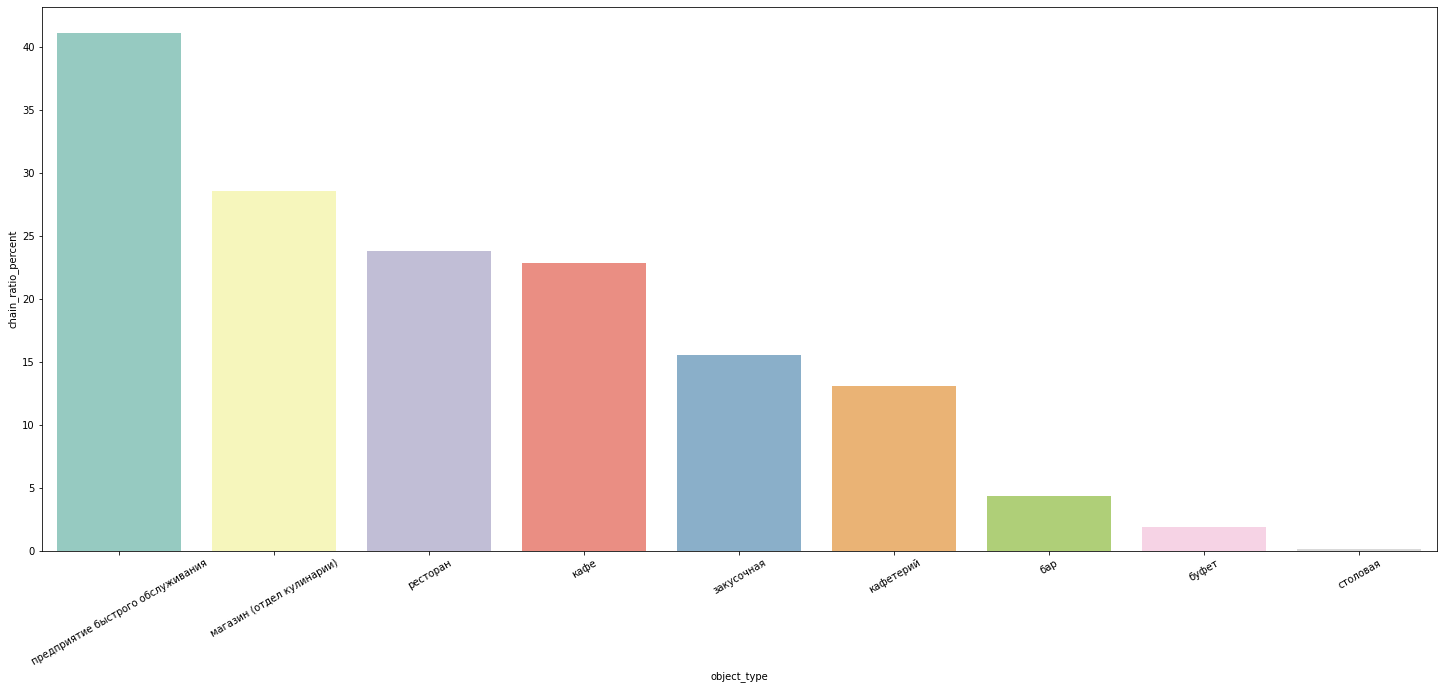

In [15]:
plt.rcParams['figure.figsize']=(25,10)
ax = sns.barplot(x='object_type', y='chain_ratio_percent', data=data_pivot_chain, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

Сетевое распространение характерно для предприятий быстрого обслуживания в большей степени, а также для магазинов (отделов кулинарии), ресторанов и кафе.

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?


Найдем среднее число посадочных мест для каждого сетевого заведения

In [16]:
data_chain = data[data['chain'] == 'да']
data_chain
data_chain_pivot_number = data_chain.pivot_table(index = 'object_name', values = 'number', aggfunc = 'mean')
data_chain_pivot_count = data_chain.pivot_table(index = 'object_name', values = 'id', aggfunc = 'count')

In [17]:
data_chain_pivot_number

,number
object_name,
beverly hills diner,88.000000
bierloga,75.000000
black & white,40.000000
bocconcino,66.666667
boobo,46.000000
...,...
ямми микс,2.000000
ян примус,300.000000
японский ресторан «ваби-саби»,155.000000


Создадим общую таблицу со средним количеством посадочных мест и количеством сетевых заведений

In [18]:
data_merge = data_chain_pivot_number.merge(data_chain_pivot_count, on='object_name', how='left')
data_merge

,number,id
object_name,,
beverly hills diner,88.000000,1
bierloga,75.000000,1
black & white,40.000000,1
bocconcino,66.666667,3
boobo,46.000000,1
...,...,...
ямми микс,2.000000,1
ян примус,300.000000,1
японский ресторан «ваби-саби»,155.000000,1


Построим график

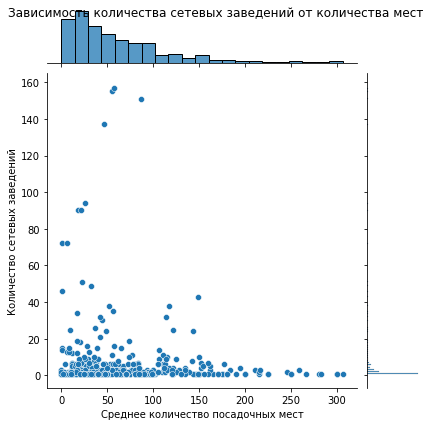

In [19]:
ax = sns.jointplot(x='number', y='id', data=data_merge) 
ax.fig.suptitle("Зависимость количества сетевых заведений от количества мест")
ax.ax_joint.set_xlabel('Среднее количество посадочных мест')
ax.ax_joint.set_ylabel('Количество сетевых заведений')
plt.show()

Вывод: для сетевых заведений характерно много заведений с малым числом посадочных мест

Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Найдем, какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики.

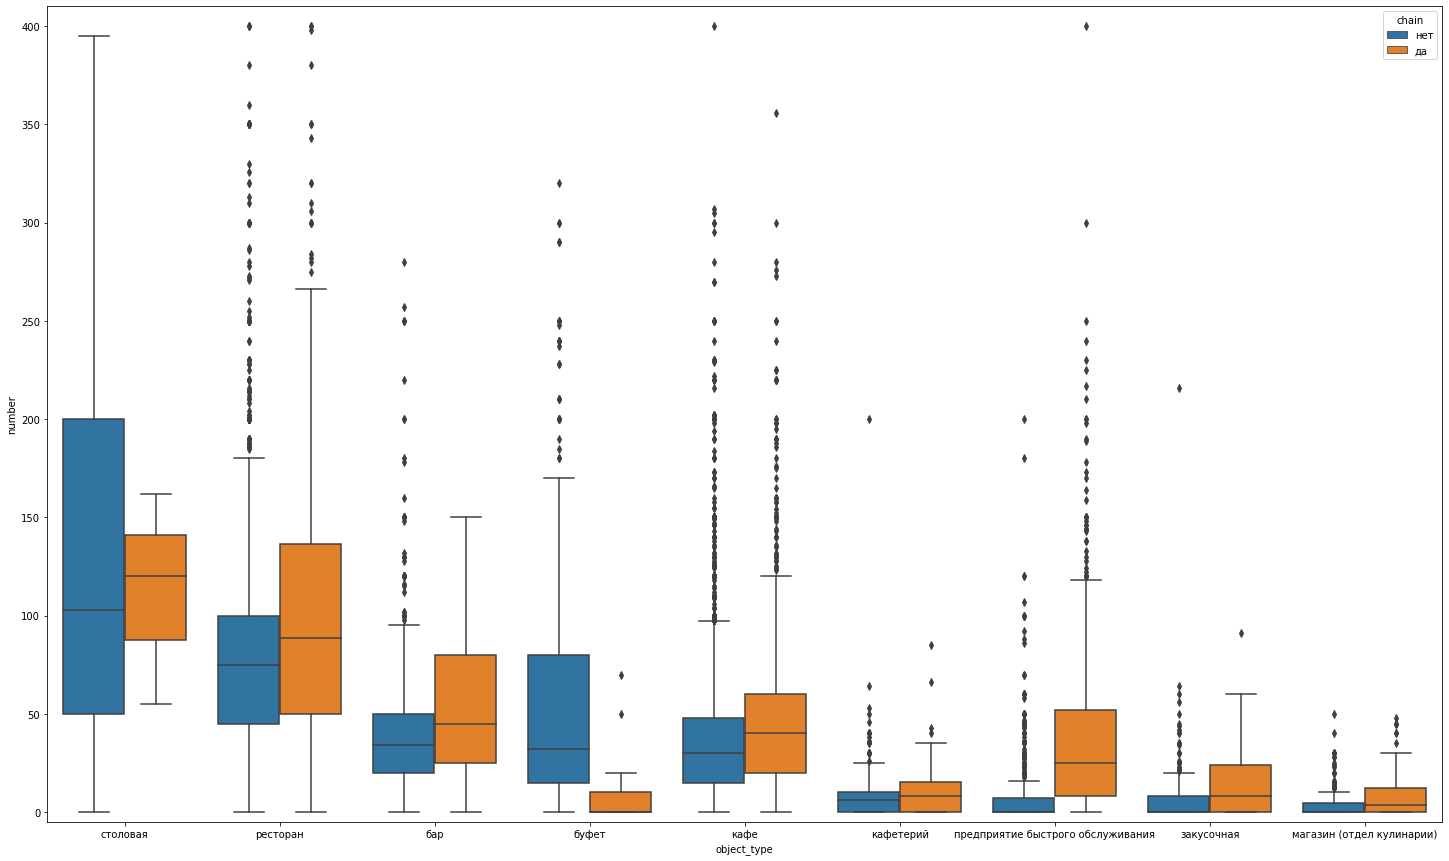

In [20]:
plt.rcParams['figure.figsize']=(25,15)
my_order = data.groupby(by=["object_type"])["number"].median().sort_values(ascending=False).index
ax = sns.boxplot(y='number', x='object_type', data=data, order=my_order, hue='chain')
ax.set_ylim(-5,410)
plt.show()

Вывод: в среднем самое большое количество посадочных мест у столовых. Также большое количество посадочных мест у ресторанов.

Выделим в отдельный столбец информацию об улице из столбца address при помощи функции.

In [21]:
street_def = ['улица', 'проезд', 'бульвар', 'шоссе', 'проспект', 'переулок', 'площадь']

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e
data['street'] = data['address'].apply(get_street)
data['street'] = data['street'].str.strip()

In [22]:
data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?


Найдем топ-10 улиц по количеству объектов общественного питания

In [23]:
data_street_pivot = data.pivot_table(index = 'street', values = 'id', aggfunc = 'count').sort_values('id', ascending = False).reset_index()
rest_data = data_street_pivot[:10]
rest_data = rest_data.rename(columns={'street':'streetname'})
rest_data

,streetname,id
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Варшавское шоссе,165
4,Ленинский проспект,148
5,проспект Вернадского,132
6,Кутузовский проспект,114
7,Каширское шоссе,112
8,Кировоградская улица,110
9,Ходынский бульвар,102


Построим график

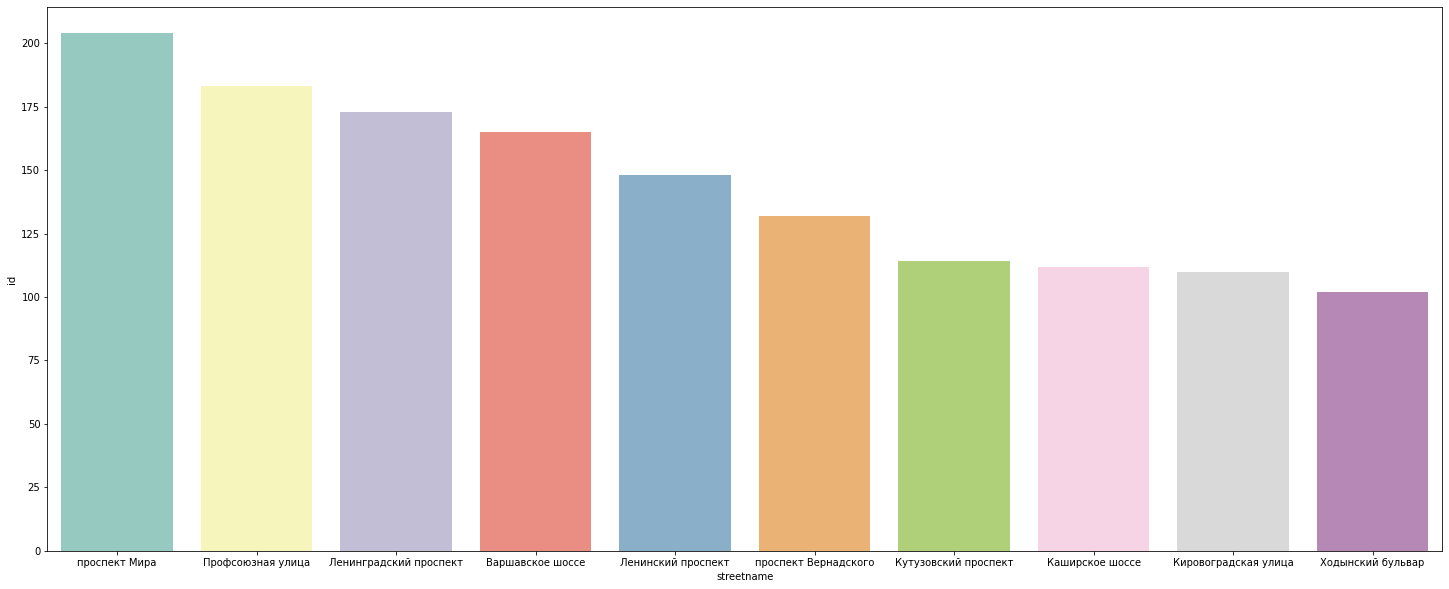

In [24]:
plt.rcParams['figure.figsize']=(25,10)
sns.barplot(x='streetname', y='id', data=rest_data, palette="Set3")
plt.show()

При помощи внешних данных найдем в каком районе находится каждая улица

In [25]:
rest_data_full = rest_data.merge(mosgaz_streets[['streetname','okrug', 'area']], on='streetname', how='left')
rest_data_full = rest_data_full.drop_duplicates('streetname', keep='first').reset_index(drop=True)
rest_data_full

,streetname,id,okrug,area
0,проспект Мира,204,СВАО,Алексеевский район
1,Профсоюзная улица,183,ЮЗАО,Академический район
2,Ленинградский проспект,173,САО,Район Аэропорт
3,Варшавское шоссе,165,ЮАО,Район Чертаново Центральное
4,Ленинский проспект,148,ЗАО,Район Проспект Вернадского
5,проспект Вернадского,132,ЗАО,Район Проспект Вернадского
6,Кутузовский проспект,114,ЗАО,Район Дорогомилово
7,Каширское шоссе,112,ЮАО,Район Москворечье-Сабурово
8,Кировоградская улица,110,ЮАО,Район Чертаново Центральное
9,Ходынский бульвар,102,САО,Хорошевский район


Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

Найдем число улиц с одним объектом общественного питания.

In [26]:
rest_data_one = data.pivot_table(index = 'street', values = 'id', aggfunc = 'count').sort_values('id').reset_index().query('id == 1')
rest_data_one = rest_data_one.rename(columns={'street':'streetname'})
rest_data_one

,streetname,id
0,Петроверигский переулок,1
1,Измайловская площадь,1
2,переулок Хользунова,1
3,переулок Расковой,1
4,переулок Маяковского,1
...,...,...
523,улица Фадеева,1
524,улица Энгельса,1
525,улица Льва Яшина,1
526,1-й Голутвинский переулок,1


Дополним таблицу названием района, в котором находятся улицы

In [27]:
rest_data_full_one = rest_data_one.merge(mosgaz_streets[['streetname','okrug', 'area']], on='streetname', how='left')
rest_data_full_one = rest_data_full_one.drop_duplicates('streetname', keep='first')
rest_data_full_one.head(5)

,streetname,id,okrug,area
0,Петроверигский переулок,1,ЦАО,Басманный район
1,Измайловская площадь,1,ВАО,Район Измайлово
2,переулок Хользунова,1,ЦАО,Район Хамовники
3,переулок Расковой,1,САО,Район Беговой
4,переулок Маяковского,1,ЦАО,Таганский район


# 3. Общий вывод

1. Исследовали соотношение видов объектов общественного питания по количеству.

Тип объекта	|	 Количество объектов
---------- | -------------
кафе |	6099
столовая	|	2587
ресторан |		2285
предприятие быстрого обслуживания	|	 1923
бар	|	856
буфет	|	585
кафетерий	|	398
закусочная	|	360
магазин (отдел кулинарии)|		273

2. Исследовали соотношение сетевых и несетевых заведений по количеству. В Москве соотношение сетевых заведений к несетевым: 81% к 19%

3. Исследовали, для какого вида объекта общественного питания характерно сетевое распространение.

Тип объекта	| Доля сетевых заведений
----------------- | ---------------
предприятие быстрого обслуживания |	41.1
магазин (отдел кулинарии) |	28.6
ресторан |	23.8
кафе	|	22.9
закусочная |	15.6
кафетерий	|	13.1
бар |	4.3
буфет |	1.9
столовая |	0.1

4. Исследовали, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест. Построили график методом jointplot. Оказалось, что для сетевых заведений характерно много заведений с малым числом посадочных мест.

5. Для каждого вида объекта общественного питания описали среднее количество посадочных мест. Нашли, какой вид предоставляет в среднем самое большое количество посадочных мест и построили график методом boxplot с разделением на сетевые и несетевые заведения. Оказалось, что в среднем самое большое количество посадочных мест у столовых. Также большое количество посадочных мест у ресторанов. У всех сетевых заведений, кроме буфетов, медианное значение посадочных мест больше, чем у несетевых.

Тип объекта | Среднее значение посадочных мест
----------------- | --------------------------
столовая      |                       103.0
ресторан         |                     80.0
бар          |                         35.0
буфет         |                        32.0
кафе           |                       30.0
кафетерий      |                        6.0
предприятие быстрого обслуживания  |    5.0
закусочная                     |        0.0
магазин (отдел кулинарии)       |       0.0

6. Построили график топ-10 улиц по количеству объектов общественного питания. Воспользовались внешней информацией и ответили на вопрос — в каких районах Москвы находятся эти улицы?

Название улицы |	Количество заведений|	Округ|	Район
------------ | ---------------------|----------|---------
проспект Мира	|204	|СВАО	|Алексеевский район
Профсоюзная улица	|183	|ЮЗАО|	Академический район
Ленинградский проспект|	173|	САО|	Район Аэропорт
Варшавское шоссе	|165	|ЮАО|	Район Чертаново Центральное
Ленинский проспект	|148	|ЗАО|	Район Проспект Вернадского
проспект Вернадского|	132	|ЗАО|	Район Проспект Вернадского
Кутузовский проспект|	114	|ЗАО	|Район Дорогомилово
Каширское шоссе|	112|	ЮАО	|Район Москворечье-Сабурово
Кировоградская улица|	110	|ЮАО|	Район Чертаново Центральное
Ходынский бульвар	|102	|САО|	Хорошевский район

7. Нашли число улиц с одним объектом общественного питания. Таких улиц получилось 528.

**Рекомендации: так как кафе оригинальное, советуем выбрать наиболее оживлённую улицу в центре города. Количество посадочных мест лучше взять среднее (от 30 до 50). Если дела пойдут хорошо, кафе можно сделать сетевым.**